# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

    1) The smartcab doesn't appear to be moving in the simulation at all. It looks like it is just stuck at the lights
    2) The simulation clearly shows that the agent receives a small positive reward when it is idle at a red light and receives a bigger negative reward when it is idle at a green light.
    3) From the weight of the rewards in the program, the agent is penalized heavily for staying idle at green light where there is no oncoming traffic when compared to the smaller positive reward given to it while being idle at red light. This could be due to more emphasis put on the cab to arrive on time.  

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

    1) In agent.py, there is a class called the LearningAgent which is parameterized by learning, epsilon and alpha parameters. 
    learning - Changing learning to True would indicate to the simulation that agent is expected to use Q learning to update the action and states,
    epsilon - continuous value for exploration factor. This is updated based on a decay function which seems to indicate that it has a higher initial value when we want to explore the environment more. When this decays, it indicates that the environment is well learnt by the agent.
    alpha - a learning rate which has a default value of 0.5. Parameter used to control convergence in Q learning. 
    
    2) In environment.py, the act(self, agent, action) function is called when an agent performs an action. The agent will recieve a reward based on the action
    
    3) From the comments in the code, render_text() is the non GUI render display of the simulation, which indicates that each of the step results is displayed on the command prompt. The render() function is only for rendering step results on the GUI. This doesn't provide any supplementary data about the learning progress. 
    
    4) The next_waypoint() function considers the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


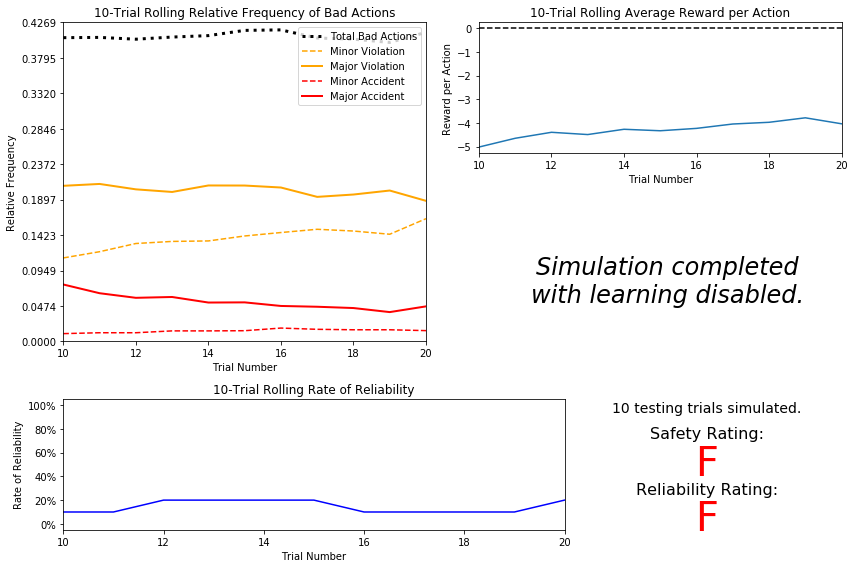

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

    1) Based on the graph above, the driving agent makes bad decisions 40% - 43% of the time. It causes accidents about 9% of the time with the amount of major violations and major accidents more than minor violation and accidents.
    2) Yes. The action that the agent needs to take (no action, left, right and forward) is decided randomly. So, the reliability rate will be very low with a lot of violations and accidents as seen in the 10 trial rolling frequency of bad actions. Here we find that the it is between 10%-20%. 
    3) Yes. The agent is receiving very high negative rewards for each of its actions as the average hovers between -4 to -5. This is understandable given the random nature of the action and no learning from the rewards given.
    4) No. All the graphs plotted show a very smooth increase or decrease of these metrics with the number of trials. So, the outcome doesn't change significantly.
    5) No, this would definitely not be safe/reliable for passengers. For starters, the Safety Rating and Reliability rating it got from the 10 testing trials were F grade respectively. Also, using a cab that takes random decisions on the road will be a major problem for passenger's safety and reliability.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

    I'm going to choose all the features that are listed in here.
    
    The feature 'inputs' is responsbile for safety as it contains information on the light color which is responsible for deciding whether to stop or go forward. It also contains other information like left, right and oncoming which helps in taking decisions on moving based on other vehicles. Among these, only the following features will be considered for this agent:
    1) light: indicates whether we need to stop or move
    2) left: need to know the intended direction of vehicle to our left before we perform any action. This will be relevant to see for right of way while turning left at the lights.
    3) oncoming: to see the direction of travel for vehicle that is oncoming
    
    The feature 'right' is not considered here because we can take free right mostly according to the right of way rules and avoiding this feature would reduce our state space. 
    
    The features 'waypoint' and 'deadline' are important for efficieny as those features decide about the direction that the smartcab is currently taking and the number of actions that are remaining for the Smartcab to reach the destination. Accurate metrics on these features will help the Smartcab reach its destination on time. From these two features, I'm going to select 'waypoint' for efficiency and not use 'deadline' because the rewards suggest that the agent is being heavily penalized for a violation/accident and putting a deadline may increase the violations. I wish to have more emphasis on safety and would not want to model deadline in my state space. Also, if we the waypoints are constructed appropriately and all traffic rules are followed, the agent can reach the destination at the right time.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

     The number of features I have selected is 'waypoint', 'light, 'left' and 'oncoming'. 'waypoint' can take 3 values which ['forward', 'left' and 'right'], 'light' can two values which are ['red', 'green'], 'left', and 'oncoming' can take 4 values ['None','left','right','forward']. So, the total number of states is 3*2*(4*4) which is 96.
     
     The amount of training trials seems to be 20 in the previous run when we did the random action experiment. Since the number of states is about 96, we certainly need more than 100 trials to learn a policy for each state.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

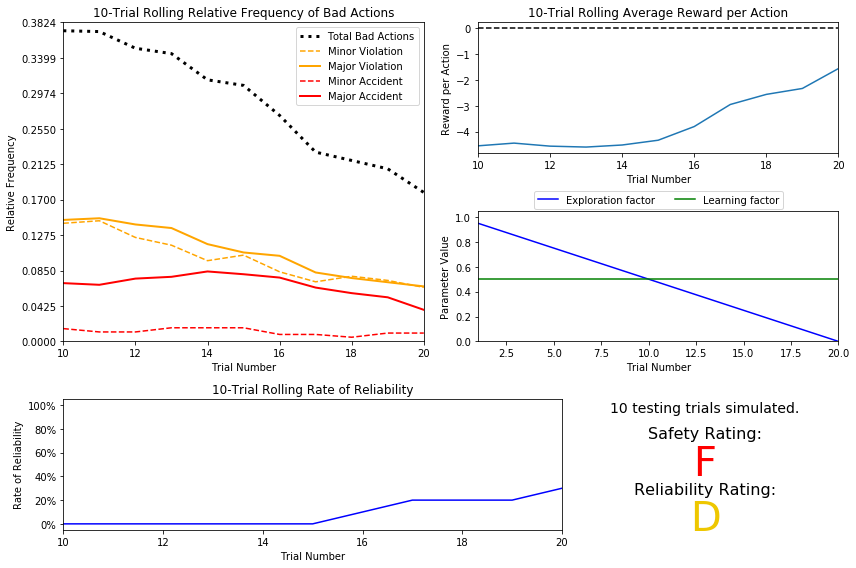

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

    Following were the questions in Question 3:
    
    1) How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?
        
        The realtive frequency of bad actions graph shows that the driving agent is making about 38% bad decisions when the trials begin and this number reduces to about 18% as the number of trials increase. This effectively shows that the agent is learning. 
        
    2) Given that the agent is driving randomly, does the rate of reliability make sense?
    
        Is not applicable for the current situation as the agent is not driving randomly here. But from the graph here, we can see that the reliability rate (around 25%) is still not better than the random agent (around 20%). This could be because of the number of training trials (20) that we have decided. If we increase that number, the reliability rate will increase as it shows an increasing trend with increase in the trial number. However, for the random agent, it will continue to hover over 20% as the agent is not learning from feedback.
        
    3) What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?
    
    In this case, the reward trend seems to be promising because, with increase in trial number, we see a progression of the rewards to 0. This indicates that the agent will start receiving positive rewards with more trials and will take right decisions with more trials.
    
    4) As the number of trials increases, does the outcome of results change significantly?
    
    Definitely yes for the default Q learning agent. The graphs show promise for this as increase in the trials shows increase in reliability, decrease in bad actions and increase in average reward
    
    5) Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?
    
    The Smartcab is still not considered safe as the Safety rating is still F. However, when compared to the basic driving agent, this is reliable with a rating of D. But, overall, it is still not safe and reliable
    
    Under additional things to consider:
    
    1) Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?
       
       When compared to the basic driving agent, we can see that the frequency of bad actions reduces from 38% to around 18% by the end of the 20 training trials. From the graphs, the average reward per action also shows an increase towards 0 which seems to indicate that the agent is learning to make proper decisions with increase in trials. The reliability rate shows an improvement as well. The only thing similar between the basic driving agent and the default Q learning agent seems to be the Safety Rating of F that is obtained in the test trials
       
    2) Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?
    
    There were 20 training trials before the 10 testing trials. The epsilon tolerance was set to 0.05 which indicates that the function is linear with respect to the number of trials. This makes sense for an initial experiment to measure how the agent operates. Ideally, we would want this tolerance to decay like an exponential function or other smooth functions.
    
    3) Is the decaying function you implemented for  Ïµ(the exploration factor) accurately represented in the parameters panel?
    
    Yes. The decaying function is linearly decreasing (1/20 = 0.05) which seems to correctly represented in the parameters panel (learning rate and exploration factor in graph above)
    
    4) As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?
    
    Yes, that is the observation from the graphs. This is great as the agent learns from its experience and with more training trials, it will tend towards an improvement in the number of bad actions and average reward
    
    5) How does the safety and reliability rating compare to the initial driving agent?
    
    The safety rating is still 'F' and is the same as the basic driving agent. However, the reliability rating has changed from 'F' to 'D'. This is the result of the learning that the agent has experienced. However, we want both ratings to be 'A' to help potential customers 

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

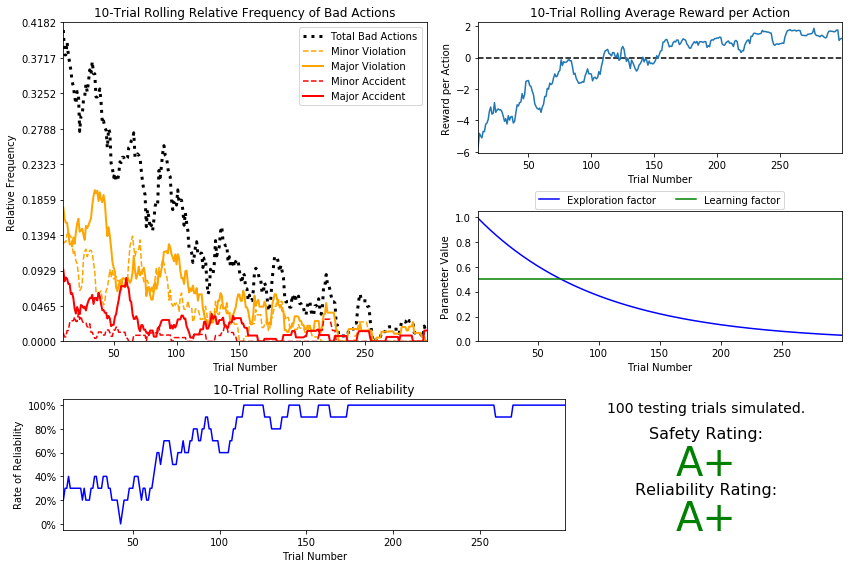

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

1) What decaying function was used for epsilon (the exploration factor)?

$ \epsilon = a^t $ where a = 0.99
    
is used for epsilon. I wanted to use a slowly decaying function for the exploration factor. So, i chose the first option that was suggested with the a parameter being 0.99
    
2) Approximately how many training trials were needed for your agent before begining testing?

About 265 trials were required for the agent before testing. Since the number of states were about 96, this is a good number to develop a model

3) What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?
    
The epsilon tolerance chosen was 0.05 and alpha (learning rate) chosen was 0.5. I kept the default values that was present in the code. Since the reliablity and safety rating was A+ with these values, I didn't find the need to change these values and experiment.

4) How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?
    
Very big improvements were made with the improved Q-learner. The quantification of these results can be understood from the graph plotted above. When we consider the relative frequency of bad actions, we can see that increased iterations has brought down the number quite a bit. The previous learner was made to learn only for 20 trials and we saw that increasing trials was making the agent perform better, however, the linear decrease in the exploration factor stopped the training fast. The slow decrease in the exploration factor lead to increase in the number of trials which made the agent learn better. We can see that modifying the exploration factor leads to increase number of iterations, which has improved reilabilty and increase the rewards per action as well.

5) Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?
    
Yes, the Q learner results show that the driving agent has successfully learned an appropriate policy which can be proved with the reliability and safety rating of A+

6) Are you satisfied with the safety and reliability ratings of the Smartcab?

Absolutely. Both are A+ over 100 trials and this shows good ratings for potential customers.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

1) Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? You can explain with words or a table, but you should thoroughly discuss the optimal policy.

The optimal policy is one where for a given state, the agent takes the right action that results in the maximum Q value all the time. In the case of the Smartcab agent, since the traffic rules are well-defined and the number of states for a given feature seems to be known with appropriate rewards allocated for the actions, it is slightly easy to suggest the best set of instructions to the agent.

In this envrironment, the optimal policy is the one where if the light is green, the waypoint state would change its state based on the traffic in left and traffic that is oncoming. When the lght is red, the waypoint state should be the same as previous state.

To summarize, following is the optimal policy:

    1) If the light is red and the waypoint is not right, the agent should stay idle.
    2) If the light is red and the waypoint is right, the agent should go forward unless left traffic is coming forward then the agent should stay idle
    3) If the light is green and the waypoint is forward or right, the agent should proceed in direction of waypoint
    4) If the light is green and the waypoint is left, the agent should proceed unless oncoming traffic is coming forward then the agent should stay idle.

2) Next, investigate the 'sim_improved-learning.txt' text file to see the results of your improved Q-Learning algorithm. For each state that has been recorded from the simulation, is the policy (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?

Following is a discussion of the results from the sim_improved-learning.txt file:

The initial state is the following with the state-action rewards:
('left', 'green', 'forward', 'left')
 -- forward : 0.66
 -- None : -4.03
 -- right : 0.09
 -- left : 1.56
 
 Here we can see that the waypoint is left, light is green and left side vehicle is moving forward while oncoming traffic is going left. This is sub-optimal as it indicates we should go left with maxumum reward, but it should stay forward as there is a vehicle going forward on the left.
 
 Another state from the file is given below:
 
 ('left', 'red', 'right', None)
 -- forward : -10.84
 -- None : 1.51
 -- right : 0.71
 -- left : 0.00
 
Here, since the light is red, the action of doing Nothing is optimal 

Following is another sub-optimal policy

('right', 'green', 'left', 'forward')
 -- forward : 0.73
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00
 
Instead of taking right, this goes forward

3) Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

Our state space is the following ('waypoint', 'light', 'left' 'oncoming'). Let's consider the first feature 'waypoint', it has 3 actions, forward, left and right. 'light' can be either be red or green, 'left' and 'oncoming' can be None, forward, left and right.

Let's consider an initial state as (left, red, None, None), it means that we need to stop as the lights are red. Here the optimal policy would be to stay idle and move to state which is (left, red, None, None) because this would be the state that gets the maximum reward.

/-------------------
| Step 0 Results
\-------------------

Environment.step(): t = 0
Environment.act() [POST]: location: (5, 3), heading: (0, 1), action: None, reward: 1.18183162851
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('left', 'red', None, None), 'deadline': 30, 't': 0, 'action': None, 'reward': 1.1818316285074273, 'waypoint': 'left'}
Agent previous state: ('left', 'red', None, None)
Agent properly idled at a red light. (rewarded 1.18)
97% of time remaining to reach destination.

The above is the result from the simulation where the agent idled at the red light for 3 steps before the light turned green.
When the lights turn green to move to a state (left, green, None, None), the optimal policy would be the following one where we have the maximum reward which is to go left and move to state (forward, green, None, None). This makes sense because we will need to take left and move forward. This is the result from the simulation.

/-------------------
| Step 4 Results
\-------------------

Environment.step(): t = 4
Environment.act() [POST]: location: (6, 3), heading: (1, 0), action: left, reward: 1.675996081
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': None, 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('left', 'green', None, None), 'deadline': 26, 't': 4, 'action': 'left', 'reward': 1.675996081001989, 'waypoint': 'left'}
Agent previous state: ('left', 'green', None, None)
Agent followed the waypoint left. (rewarded 1.68)
83% of time remaining to reach destination.

After a few steps, lets take step 20. Following are the results:

/-------------------
| Step 20 Results
\-------------------

Environment.step(): t = 20
Environment.act() [POST]: location: (1, 2), heading: (0, -1), action: None, reward: 2.03428067966
Environment.act(): Step data: {'inputs': {'light': 'red', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'red', 'state': ('forward', 'red', None, 'left'), 'deadline': 10, 't': 20, 'action': None, 'reward': 2.034280679663013, 'waypoint': 'forward'}
Agent previous state: ('forward', 'red', None, 'left')
Agent properly idled at a red light. (rewarded 2.03)
30% of time remaining to reach destination

The previous state was forward, red, None, left. The agent has decided to idle which is the optimal policy. Now, when the light changes to green, following are the results:

/-------------------
| Step 21 Results
\-------------------

Environment.step(): t = 21
Environment.act(): Primary agent has reached destination!
Environment.act() [POST]: location: (1, 7), heading: (0, -1), action: forward, reward: 1.08138270959
Environment.act(): Step data: {'inputs': {'light': 'green', 'oncoming': 'left', 'right': None, 'left': None}, 'violation': 0, 'light': 'green', 'state': ('forward', 'green', None, 'left'), 'deadline': 9, 't': 21, 'action': 'forward', 'reward': 1.0813827095927024, 'waypoint': 'forward'}
Agent previous state: ('forward', 'green', None, 'left')
Agent followed the waypoint forward. (rewarded 1.08)
27% of time remaining to reach destination.

Here the optimal policy is to move forward because it is green light. After following the optimal policy through out, it has reached the destination as well.

4) Try to find at least one entry where the smartcab did not learn the optimal policy. Discuss why your cab may have not learned the correct policy for the given state.

Following is an entry where the smartcab didn't learn the optimal policy.

('right', 'green', 'left', 'forward')
 -- forward : 0.73
 -- None : 0.00
 -- right : 0.00
 -- left : 0.00
 
 The waypoint is right, light is green, left side vehicle is moving left while the oncoming vehicle is moving forward.
 The optimal policy would be to go right, but it has decided to go forward. The reward for going right is 0 here.  This indicates that the agent has learned to not cause any major violation till this point thereby giving more importance to safety than reliability here. 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.